# Analyse der Webanwendung  "PetClinic"  
   
   

## _Priorisierung von Umbauarbeiten nach Nutzungsgrad_


#### Technische Vorbereitung: Laden der Analysewerkzeuge

In [1]:
import pandas as pd
import py2neo
graph = py2neo.Graph(password="password")

## Aggregation der Messwerte nach Subdomänen

In [2]:
query = """
MATCH 
  (t:Type)-[:BELONGS_TO]->(s:Subdomain),
  (t)-[:HAS_CHANGE]->(ch:Change),
  (t)-[:HAS_MEASURE]->(co:Coverage),
  (t)-[:DECLARES]->(m:Method)
OPTIONAL MATCH
  (t)-[:HAS_BUG]->(b:BugInstance)   
RETURN 
  s.name as ASubdomain,
  COUNT(DISTINCT t) as Types,
  COUNT(DISTINCT ch) as Changes,
  AVG(co.ratio) as Coverage,
  COUNT(DISTINCT b) as Bugs,
  SUM(DISTINCT m.lastLineNumber) as Lines
ORDER BY Coverage ASC, Bugs DESC
"""

### Ergebnisse nach Subdomänen

In [3]:
result = pd.DataFrame(graph.data(query))
result

,ASubdomain,Bugs,Changes,Coverage,Lines,Types
0,Vet,0,75,0.155273,828,5
1,Visit,0,90,0.474944,1738,6
2,Owner,3,94,0.519492,2948,4
3,Pet,1,167,0.525654,3045,11
4,crossfunctional,2,53,0.625676,742,5
5,Clinic,0,26,0.888889,824,1
6,Person,0,5,1.000000,215,1
7,Specialty,0,4,1.000000,28,1


### Umbenennung nach geläufigen Begriffen

In [4]:
plot_data = result.copy()
plot_data = plot_data.rename(
    columns= {
        "Changes" : "Investment",
        "Coverage" : "Utilization",
        "Lines" : "Size"})
plot_data

,ASubdomain,Bugs,Investment,Utilization,Size,Types
0,Vet,0,75,0.155273,828,5
1,Visit,0,90,0.474944,1738,6
2,Owner,3,94,0.519492,2948,4
3,Pet,1,167,0.525654,3045,11
4,crossfunctional,2,53,0.625676,742,5
5,Clinic,0,26,0.888889,824,1
6,Person,0,5,1.000000,215,1
7,Specialty,0,4,1.000000,28,1


In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_portfolio_diagramm(plot_data, name):
    x = "Investment"
    y = "Utilization"
    
    ax = plot_data.plot.scatter(
        x,
        y,
        s=plot_data.Size,
        alpha=0.7,
        title="Return on Investment ({})".format(name),
        figsize=[10,7],
        fontsize=14
    )

    ax.title.set_size(24)
    ax.title
    plt.xlabel(x, fontsize=18)
    plt.ylabel(y, fontsize=18)
    
    ax.plot(
        [plot_data[x].max()/2, plot_data[x].max()/2],
        [0, plot_data[y].max()], color='k', linestyle='--', linewidth=0.6)
    ax.plot(
        [0, plot_data[x].max()],
        [plot_data[y].max()/2,plot_data[y].max()/2], color='k', linestyle='--', linewidth=0.6)
    ax.text(plot_data[x].max()*1/4, plot_data[y].max()*3/4, "Success", ha="center", fontsize=24)
    ax.text(plot_data[x].max()*3/4, plot_data[y].max()*3/4, "Beware", ha="center", fontsize=24)
    ax.text(plot_data[x].max()*1/4, plot_data[y].max()*1/4, "Watch", ha="center", fontsize=24)
    ax.text(plot_data[x].max()*3/4, plot_data[y].max()*1/4, "Failure", ha="center", fontsize=24)

### Vier-Felder-Matrix zur Priorisierung nach Subdomänen

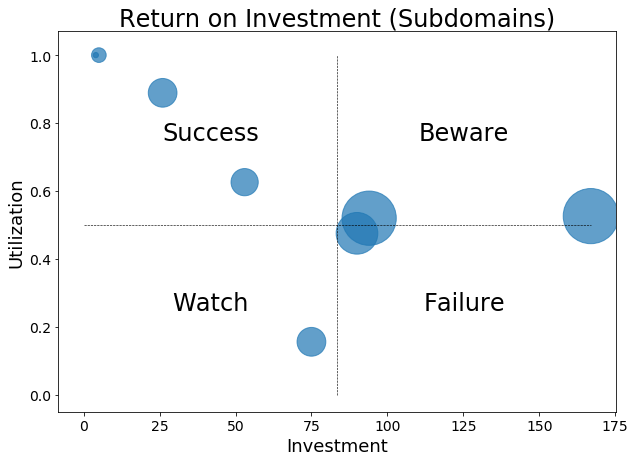

In [6]:
plot_portfolio_diagramm(plot_data, "Subdomains")

## Aggregation der Messwerte nach technischen Aspekten

In [7]:
query = """
MATCH 
  (t:Type)-[:IS_A]->(ta:TechnicalAspect),
  (t)-[:HAS_CHANGE]->(ch:Change),
  (t)-[:HAS_MEASURE]->(co:Coverage),
  (t)-[:DECLARES]->(m:Method)
OPTIONAL MATCH
  (t)-[:HAS_BUG]->(b:BugInstance)   
RETURN 
  ta.name as ATechnicalAspect,
  COUNT(DISTINCT t) as Types,
  COUNT(DISTINCT ch) as Investment,
  AVG(co.ratio) as Utilization,
  COUNT(DISTINCT b) as Bugs,
  SUM(DISTINCT m.lastLineNumber) as Size
ORDER BY Utilization ASC, Bugs DESC
"""

### Ergebnisse nach technischen Aspekten

In [8]:
result = pd.DataFrame(graph.data(query))
result

,ATechnicalAspect,Bugs,Investment,Size,Types,Utilization
0,jdbc,1,152,2093,8,0.000000
1,util,2,23,525,2,0.478947
2,web,2,156,2266,7,0.633593
3,model,1,91,3330,10,0.732048
4,jpa,0,54,580,4,0.741659
5,service,0,26,824,1,0.888889
6,petclinic,0,5,637,1,1.000000


### Vier-Felder-Matrix zur Priorisierung nach technischen Aspekten

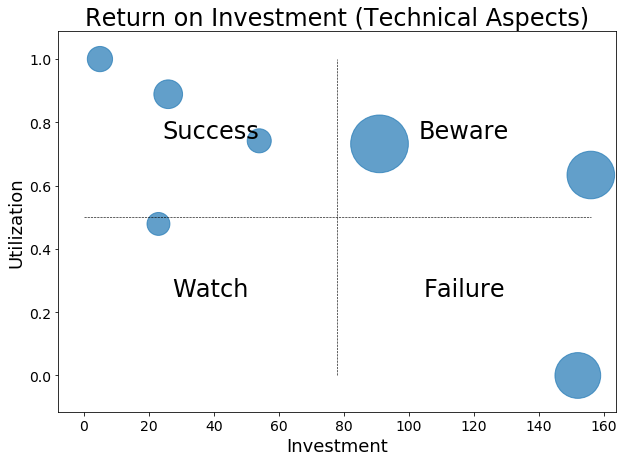

In [9]:
plot_portfolio_diagramm(result, "Technical Aspects")

## Ende Demo